<a href="https://colab.research.google.com/github/lolHanz/uni/blob/main/semantic_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import nltk
nltk.download("stopwords")
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
#import gensim.downloader as api
#wv = api.load('word2vec-google-news-300')

In [ ]:
!pip install textblob

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install -U sentence-transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 5.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 78.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 82.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 24.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 104.9 MB/s eta 0:00:00
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125926 sha256=7fb777031df2924a8025c25123c7d52e843bbd972883e65dc305ad469fa3ca90
  Stored in directory: /root/.cache/pip/wheels/62/f2/10/1e606fd5f02395388f74e7462910fe851042f97238cbbd902f
Successfully built sentence-transformers


In [ ]:
!apt update
!apt install enchant --fix-missing
!apt install -qq enchant
!pip install pyenchant

Get:1 https://cloud.r-project.org/bin/linux/ubuntu focal-cran40/ InRelease [3,622 B]
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2004/x86_64  InRelease
Hit:3 http://archive.ubuntu.com/ubuntu focal InRelease
Get:4 http://archive.ubuntu.com/ubuntu focal-updates InRelease [114 kB]
Get:5 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu focal InRelease [18.1 kB]
Get:6 http://security.ubuntu.com/ubuntu focal-security InRelease [114 kB]
Get:7 http://archive.ubuntu.com/ubuntu focal-backports InRelease [108 kB]
Hit:8 http://ppa.launchpad.net/cran/libgit2/ubuntu focal InRelease
Hit:9 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu focal InRelease
Get:10 http://archive.ubuntu.com/ubuntu focal-updates/universe amd64 Packages [1,346 kB]
Hit:11 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu focal InRelease
Hit:12 http://ppa.launchpad.net/ubuntugis/ppa/ubuntu focal InRelease
Get:13 http://archive.ubuntu.com/ubuntu focal-updates/main amd64 Packages [3,202 kB]
Get:14 h

In [ ]:
!pip install hdbscan

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.2/5.2 MB 60.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for hdbscan: filename=hdbscan-0.8.29-cp310-cp310-linux_x86_64.whl size=3541999 sha256=1cb863883d1c7cb1da93922baedf280a13ddd47a2da15711fc2070c0dee34d13
  Stored in directory: /root/.cache/pip/wheels/dc/52/e3/6c6b60b126b4d5c4370cb5ac071b82950f91649d62d72f7f56
Successfully built hdbscan


In [ ]:
import os
import pandas as pd
import numpy as np
import string
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import enchant
from sklearn import feature_extraction
import torch
from sklearn.decomposition import IncrementalPCA
from sklearn.manifold import TSNE
from textblob import TextBlob
from sentence_transformers import SentenceTransformer
#from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.decomposition import IncrementalPCA
from sklearn.manifold import TSNE
import random
import hdbscan
from sklearn.metrics.cluster import normalized_mutual_info_score
from sklearn.metrics.cluster import adjusted_rand_score

In [ ]:
# adderall = pd.read_csv("/content/scrapdrugs/ADHD/Adderall.csv", encoding='cp1252')
# methylphenidate = pd.read_csv("/content/scrapdrugs/ADHD/Methylphenidate.csv", encoding='cp1252')
# dataset = adderall["Review"].to_list()
# print(dataset)

# df = pd.DataFrame({'drug': 'adderall','text': [adderall["Review"]]})
# entry = {'drug': 'methylphenidate','text': methylphenidate["Review"]}
# df.loc[len(df)] = entry
# display(df)

In [ ]:
# folder_path = "/content/scrapdrugs/ADHD"

# data = []

# for file_name in os.listdir(folder_path):
#   if file_name.endswith('.csv'):
#     drug_name = os.path.splitext(file_name)[0]
#     file_path = os.path.join(folder_path, file_name)
#     csv_data = pd.read_csv(file_path, encoding='cp1252')
#     review_text = csv_data["Review"].to_string(index=False)
#     entry = {'drug': drug_name, 'text': review_text}

#     data.append(entry)

# df = pd.DataFrame(data)
# display(df)

In [ ]:
csv_path = "/content/drug_review_train.csv"

csv_data = pd.read_csv(csv_path)
grouped_reviews = csv_data.groupby('drugName')['review'].apply(lambda x: ' '.join(x)).reset_index()
grouped_reviews.columns = ['drug', 'text']
df = grouped_reviews
display(grouped_reviews)


,drug,text
0,A + D Cracked Skin Relief,"""i have severe cracked skin on my hands. i've..."
1,A / B Otic,"""it numbs the pain. it makes my ear feel heavi..."
2,Abacavir / dolutegravir / lamivudine,"""i was born with hiv my birth mother transfer..."
3,Abacavir / lamivudine / zidovudine,"""i was diagnosed back in 2008 and have been on..."
4,Abatacept,"""after rashes, pain, nausea, and elevated liv..."
...,...,...
2860,Zyvox,"""i was diagnosed with mrsa in the hospital. th..."
2861,ZzzQuil,"""i usually work a 10 hr shift in the afternoon..."
2862,depo-subQ provera 104,"""not only did i gain ten pounds in just a few ..."
2863,ella,"""took ella one 90 hours after unprotected sex,..."


In [ ]:
def removePunctuation(text):
    pattern = r'[^\w\s]'
    return re.sub(pattern, '', text)

def removeStopWords(text):
    stopWords = set(stopwords.words('english'))
    words = text.split()
    filteredWords = [word for word in words if word.lower() not in stopWords]
    return ' '.join(filteredWords)

def removeNonEnglishWords(text):
    english_dict = enchant.Dict("en_US")
    words = text.split()
    filtered_words = [word for word in words if english_dict.check(word)]
    return ' '.join(filtered_words)

def removeShortWords(text):
    words = text.split()
    filtered_words = [word for word in words if len(word) > 2]
    return ' '.join(filtered_words)

def removeWordsWithNumber(text):
    words = text.split()
    clean_words = [word for word in words if not re.search(r'\d', word)]
    return ' '.join(clean_words)

def lemmatizeText(text):
    lemmatizer = WordNetLemmatizer()
    words = text.split()
    lemmatized_words = [lemmatizer.lemmatize(word) for word in words]
    return ' '.join(lemmatized_words)

def correctSpelling(text):
    blob = TextBlob(text)
    corrected_text = str(blob.correct())
    return corrected_text

for i in range(len(df)):
  textToLower = df['text'].iloc[i]
  lowercaseText = str(textToLower).lower()
  cleanText = lowercaseText
  #cleanText = removePunctuation(lowercaseText)
  #cleanText = removeStopWords(cleanText)
  #cleanText = correctSpelling(cleanText)
  #cleanText = removeNonEnglishWords(cleanText)
  #cleanText = removeShortWords(cleanText)
  #cleanText = removeWordsWithNumber(cleanText)
  #cleanText = lemmatizeText(cleanText)
  df.at[i, 'text'] = cleanText

display(df)

,drug,text
0,A + D Cracked Skin Relief,"""i have severe cracked skin on my hands. i've..."
1,A / B Otic,"""it numbs the pain. it makes my ear feel heavi..."
2,Abacavir / dolutegravir / lamivudine,"""i was born with hiv my birth mother transfer..."
3,Abacavir / lamivudine / zidovudine,"""i was diagnosed back in 2008 and have been on..."
4,Abatacept,"""after rashes, pain, nausea, and elevated liv..."
...,...,...
2860,Zyvox,"""i was diagnosed with mrsa in the hospital. th..."
2861,ZzzQuil,"""i usually work a 10 hr shift in the afternoon..."
2862,depo-subQ provera 104,"""not only did i gain ten pounds in just a few ..."
2863,ella,"""took ella one 90 hours after unprotected sex,..."


In [ ]:
#THIS TAKES 20 MINS BTW
model = SentenceTransformer('all-mpnet-base-v2')

sentences = []
sentence_embeddings = {}
drug_embedding_pairs = {}

def splitSentences(text):
    sentences = re.split(r'(?<!\w\.\w.)(?<![A-Z][a-z]\.)(?<=\.|\?)\s', text)
    return sentences

for i in range(len(df)):
  text = df['text'].loc[i]
  sentences = splitSentences(text)
  sentence_embeddings[df['drug'].loc[i]] = model.encode(sentences)

for drug in sentence_embeddings:
  embeddings_array = np.array(sentence_embeddings[drug])
  average_embedding = np.mean(embeddings_array, axis=0)
  drug_embedding_pairs[drug] = average_embedding




KeyboardInterrupt: ignored

In [ ]:
#print(drug_embedding_pairs['adderall'].shape)

rows = []

for drug, embedding in drug_embedding_pairs.items():
    row = {'Drug': drug, 'Embedding': [embedding]}
    rows.append(row)

embeddings_df = pd.DataFrame(rows)

display(embeddings_df)

,Drug,Embedding
0,A + D Cracked Skin Relief,"[[0.020139765, -0.0019696858, -0.008867079, -0..."
1,A / B Otic,"[[0.004298174, -0.0311642, -0.01727954, -0.020..."
2,Abacavir / dolutegravir / lamivudine,"[[0.004319879, -0.0063214544, -0.010240872, -0..."
3,Abacavir / lamivudine / zidovudine,"[[0.030545734, -0.0038166754, -0.017006554, -0..."
4,Abatacept,"[[0.011487268, 0.0073513957, -0.011165712, -0...."
...,...,...
2860,Zyvox,"[[0.0275798, -0.011787931, -0.013260303, -0.03..."
2861,ZzzQuil,"[[-0.008253933, -0.014484027, 0.0040577827, -0..."
2862,depo-subQ provera 104,"[[0.025758846, 0.036188845, -0.019260056, -0.0..."
2863,ella,"[[-0.0062738936, -0.018434057, -0.022607123, -..."


In [ ]:
#for i in range(len(embeddings_df)):
  #sentence_embedding = np.array(embeddings_df['Embeddings'].iloc[i])


def reduceDimension(df):
  embeddings_array = np.array(df['Embedding'].tolist())
  embeddings_array = embeddings_array.reshape(-1, 768)
  tsne = TSNE(n_components=2) #change perplexity later
  reduced_embeddings = tsne.fit_transform(embeddings_array)
  reduced_embeddings_list = reduced_embeddings.tolist()
  df['2d Embedding'] = reduced_embeddings_list

  return df, reduced_embeddings

embeddings_df, reduced_embeddings = reduceDimension(embeddings_df)
display(embeddings_df)


,Drug,Embedding,2d Embedding
0,A + D Cracked Skin Relief,"[[0.020139765, -0.0019696858, -0.008867079, -0...","[47.409183502197266, -36.694515228271484]"
1,A / B Otic,"[[0.004298174, -0.0311642, -0.01727954, -0.020...","[27.227380752563477, 35.140380859375]"
2,Abacavir / dolutegravir / lamivudine,"[[0.004319879, -0.0063214544, -0.010240872, -0...","[-23.6479434967041, -11.534573554992676]"
3,Abacavir / lamivudine / zidovudine,"[[0.030545734, -0.0038166754, -0.017006554, -0...","[-16.680017471313477, -18.98284912109375]"
4,Abatacept,"[[0.011487268, 0.0073513957, -0.011165712, -0....","[-13.678437232971191, -11.121296882629395]"
...,...,...,...
2860,Zyvox,"[[0.0275798, -0.011787931, -0.013260303, -0.03...","[23.092588424682617, -4.531130313873291]"
2861,ZzzQuil,"[[-0.008253933, -0.014484027, 0.0040577827, -0...","[-5.6327714920043945, 62.538211822509766]"
2862,depo-subQ provera 104,"[[0.025758846, 0.036188845, -0.019260056, -0.0...","[-8.813774108886719, -60.76133346557617]"
2863,ella,"[[-0.0062738936, -0.018434057, -0.022607123, -...","[4.5728230476379395, -60.23871612548828]"


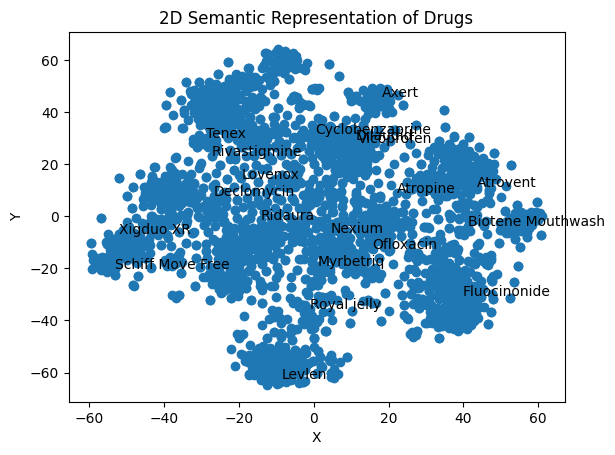

In [ ]:
x_values = []
y_values = []
drug_names = []

for drug, embedding in zip(embeddings_df['Drug'], embeddings_df['2d Embedding']):
    x_values.append(embedding[0])
    y_values.append(embedding[1])
    drug_names.append(drug)

plt.scatter(x_values, y_values)
num_labels = min(20, len(drug_names))
random_indices = random.sample(range(len(drug_names)), num_labels)

#for i, drug in enumerate(drug_names):
    #plt.annotate(drug, (x_values[i], y_values[i]))

for i in random_indices:
    plt.annotate(drug_names[i], (x_values[i], y_values[i]))

plt.xlabel('X')
plt.ylabel('Y')
plt.title('2D Semantic Representation of Drugs')
plt.show()

In [ ]:
# model = SentenceTransformer('all-mpnet-base-v2')

# sentences = ['he was getting into trouble every day.', 'my phone was ringing none stop.', 'i was disciplining him all day.']

# sentence_embeddings = model.encode(sentences)

# sentence_embeddings = np.array(sentence_embeddings)
# average_embedding = np.mean(sentence_embeddings, axis=0)
# average_embedding = average_embedding.reshape(1, -1)
# print(average_embedding.shape)


# pca = PCA(min(average_embedding.shape[0], average_embedding.shape[1]))
# reduced_embeddings = pca.fit_transform(average_embedding)

# print(reduced_embeddings)


#labels = ['sentence 1']

#plt.scatter(reduced_embeddings[:, 0], reduced_embeddings[:, 1], c=labels)
#plt.colorbar()
#for i, label in enumerate(labels):
  #plt.annotate(label, (reduced_embeddings[i, 0], reduced_embeddings[i, 1]))

#plt.show()

In [ ]:
# model = SentenceTransformer('all-mpnet-base-v2')

# sentences = ['he was getting into trouble every day.', 'my phone was ringing none stop.', 'i was disciplining him all day.']

# sentence_embeddings = model.encode(sentences)

# average_embedding = np.array(sentence_embeddings)
# #average_embedding = np.mean(sentence_embeddings, axis=0)
# #average_embedding = average_embedding.reshape(1, -1)
# print(len(average_embedding))

# tsne = TSNE(n_components=2, perplexity=2)


# #average_embedding = np.expand_dims(average_embedding, axis=0)
# print(average_embedding.shape)

# reduced_embeddings = tsne.fit_transform(average_embedding)
# print(reduced_embeddings)

# labels = ['sentence 1']

# labels = ['sentence 1', 'sentence 2', 'sentence 3']

# plt.scatter(reduced_embeddings[:, 0], reduced_embeddings[:, 1])
# plt.colorbar()
# for i, label in enumerate(labels):
#   plt.annotate(label, (reduced_embeddings[i, 0], reduced_embeddings[i, 1]))

# plt.show()

In [ ]:
def generate_clusters(min_cluster_size, min_samples = None):
  clusterer = hdbscan.HDBSCAN(min_cluster_size=min_cluster_size,
                             min_samples = min_samples,
                             metric='euclidean',
                             gen_min_span_tree=True,
                             cluster_selection_method='eom')
  clusters = clusterer.fit(reduced_embeddings)
  return clusters

clusters = generate_clusters(min_cluster_size=20)

Cluster 0: Neo-Poly-Dex, Naphazoline / pheniramine
Cluster 1: Natazia, Camrese
Cluster 2: Biafine, X-Viate
Cluster 3: ProAir HFA, Guaifenesin
Cluster 4: Axert, Eletriptan
Cluster 5: Ospemifene, Flibanserin
Cluster 6: Chloral hydrate, Zolpimist
Cluster 7: Uribel, Phosphorated carbohydrate solution
Cluster 8: Darbepoetin alfa, Neulasta
Cluster 9: Bontril PDM, Insulin detemir
Cluster 10: Evolocumab, Tarka
Cluster 11: MS Contin, Zipsor
Cluster 12: Kapidex, Ex-Lax Maximum Relief Formula
Cluster 13: Bevacizumab, Proleukin
Cluster 14: Plaquenil, Avonex Pen
Cluster 15: Oxcarbazepine, Trileptal
Cluster 16: Medrol, Aripiprazole
Cluster -1: Synjardy, Scopolamine


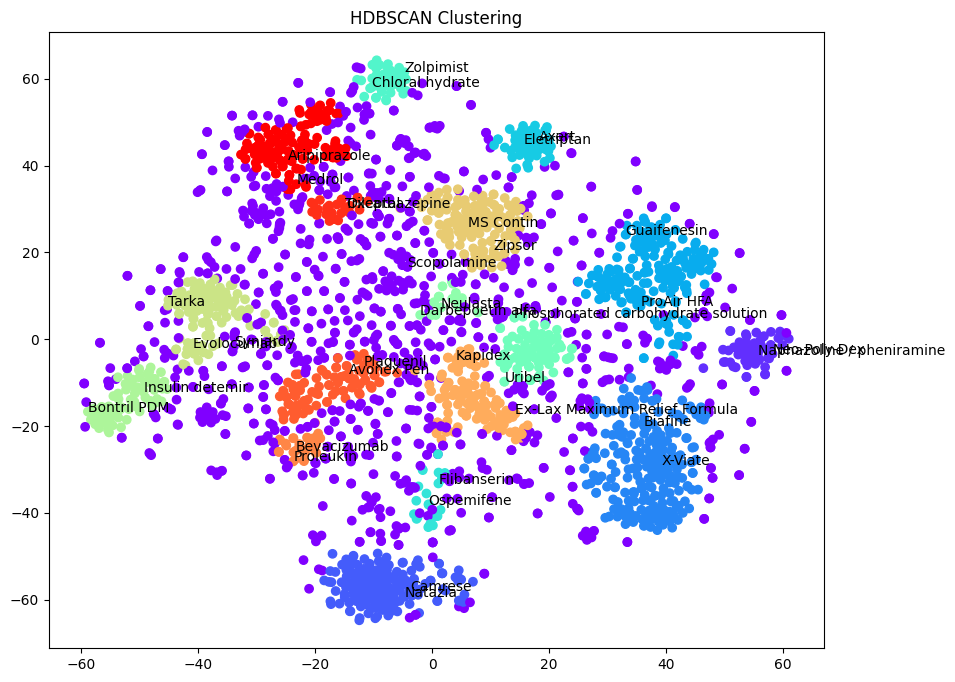

In [ ]:
#plt.scatter(x_values, y_values, c=clusters.labels_, cmap='rainbow')
unique_labels = set(clusters.labels_)
plt.figure(figsize=(10, 8))
for label in unique_labels:
  cluster_indices = [i for i, l in enumerate(clusters.labels_) if l == label]
  random_indices = random.sample(cluster_indices, min(2, len(cluster_indices)))
  selected_drugs = [drug_names[i] for i in random_indices]
  print(f"Cluster {label}: {', '.join(selected_drugs)}")

  for i in random_indices:
    plt.annotate(drug_names[i], (x_values[i], y_values[i]))


plt.scatter(x_values, y_values, c=clusters.labels_, cmap='rainbow')
plt.title("HDBSCAN Clustering")
plt.show()

In [ ]:
from sentence_transformers import util
import random

random_drug_1 = random.randint(0, 2685)
embedding1 = embeddings_df['Embedding'].iloc[random_drug_1]
drug_name1 = embeddings_df['Drug'].iloc[random_drug_1]
random_drug_2 = random.randint(0, 2685)
embedding2 = embeddings_df['Embedding'].iloc[random_drug_2]
drug_name2 = embeddings_df['Drug'].iloc[random_drug_2]
cos_sim = util.cos_sim(embedding1, embedding2)

print(drug_name1, drug_name2, cos_sim)

Januvia Hyosyne tensor([[0.7378]])
